### Necessary Library 

In [ ]:
!pip install mat4py

In [14]:
import pandas as pd
import numpy as np
import scipy.io
import os
import mat4py
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)

### Data Cleaning - matlab to csv conversion

#### Healthy Bearing

In [75]:
data_dict = scipy.io.loadmat(r'/Users/arivarasuperumal/Desktop/condition_monitoring/iot-condition-monitoring/data/N09_M07_F10_K001_1.mat')
data_array = data_dict['N09_M07_F10_K001_1']
df_health = pd.DataFrame(data_array.flatten())

In [76]:
df_health

,Info,X,Y,Description
0,"[[[[[2]], [[1]], [[22]]]]]","[[[[], [[4]], [[-2.22416314e-04 2.78020392e-0...","[[[['force'], [[4]], [[927.26279233 919.938573...","[[[[[(array(['admin'], dtype='<U5'), array(['1..."


In [77]:
pd.DataFrame(df_health['Info'][0].flatten())

,RevisionMajor,RevisionMinor,MeasurementID
0,[[2]],[[1]],[[22]]


In [78]:
pd.DataFrame(df_health['X'][0].flatten())

,Name,Type,Data,Unit,Raster
0,[],[[4]],"[[-0.00022241631372343917, 2.7802039215374386e...",[],[Mech_4kHz]
1,[],[[4]],"[[-3.4217894419041883e-06, 1.1976263046609148e...",[],[HostService]
2,[],[[4]],"[[0.0, 0.999614193240426, 1.9992279587571717, ...",[],[Temp_1Hz]


In [79]:
len(pd.DataFrame(df_health['X'][0].flatten())['Data'][0].flatten())

16008

In [80]:
cm_data_x = pd.DataFrame(df_health['X'][0].flatten())

cm_data_x['Raster'] = cm_data_x['Raster'].apply(lambda x: x.flatten()[0])
cm_data_x['Type'] = cm_data_x['Type'].apply(lambda x: x.flatten()[0])
cm_data_x['Data'] = cm_data_x['Data'].apply(lambda x: x.flatten())

In [82]:
pd.DataFrame(df_health['Y'][0].flatten())

,Name,Type,Data,Unit,Raster,Device,XIndex,DownSampling,Description,DisplayIdentifier,Path,Flags,Min,Max,MinWeak,MaxWeak
0,[force],[[4]],"[[927.2627923316428, 919.9385735864832, 949.54...",[],[Mech_4kHz],[Platform],[[1]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
1,[phase_current_1],[[4]],"[[-0.8726864618256157, -0.945697326035178, -1....",[],[HostService],[Platform],[[2]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
2,[phase_current_2],[[4]],"[[-1.1461328117425609, -1.2453173819895134, -1...",[],[HostService],[Platform],[[2]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
3,[speed],[[4]],"[[899.4742444862216, 899.4744255925016, 899.47...",[],[Mech_4kHz],[Platform],[[1]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
4,[temp_2_bearing_module],[[4]],"[[46.78039547689698, 47.00927731268321, 46.987...",[],[Temp_1Hz],[Platform],[[3]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
5,[torque],[[4]],"[[1.1407149606974627, 1.1488338324089749, 1.14...",[],[Mech_4kHz],[Platform],[[1]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
6,[vibration_1],[[4]],"[[0.0640869140201472, -0.122070312419328, 0.11...",[],[HostService],[Platform],[[2]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]


In [83]:
cm_data_y = pd.DataFrame(df_health['Y'][0].flatten())

cm_data_y['Name'] = cm_data_y['Name'].apply(lambda x: x.flatten()[0])
cm_data_y['Type'] = cm_data_y['Type'].apply(lambda x: x.flatten()[0])
cm_data_y['Data'] = cm_data_y['Data'].apply(lambda x: x.flatten())
cm_data_y['Unit'] = cm_data_y['Unit'].apply(lambda x: x.flatten())
cm_data_y['Raster'] = cm_data_y['Raster'].apply(lambda x: x.flatten()[0])
cm_data_y['Device'] = cm_data_y['Device'].apply(lambda x: x.flatten()[0])
cm_data_y['XIndex'] = cm_data_y['XIndex'].apply(lambda x: x.flatten()[0])
cm_data_y['DownSampling'] = cm_data_y['DownSampling'].apply(lambda x: x.flatten()[0])

In [84]:
cm_data_y.head()

,Name,Type,Data,Unit,Raster,Device,XIndex,DownSampling,Description,DisplayIdentifier,Path,Flags,Min,Max,MinWeak,MaxWeak
0,force,4,"[927.2627923316428, 919.9385735864832, 949.540...",[],Mech_4kHz,Platform,1,1,[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
1,phase_current_1,4,"[-0.8726864618256157, -0.945697326035178, -1.0...",[],HostService,Platform,2,1,[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
2,phase_current_2,4,"[-1.1461328117425609, -1.2453173819895134, -1....",[],HostService,Platform,2,1,[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
3,speed,4,"[899.4742444862216, 899.4744255925016, 899.474...",[],Mech_4kHz,Platform,1,1,[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
4,temp_2_bearing_module,4,"[46.78039547689698, 47.00927731268321, 46.9879...",[],Temp_1Hz,Platform,3,1,[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]


In [85]:
final = cm_data_x[['Raster','Data','Type']].merge(cm_data_y[['Name','Type','Data','Raster','Device','XIndex','DownSampling']], on = 'Raster', how = 'left')

In [86]:
final

,Raster,Data_x,Type_x,Name,Type_y,Data_y,Device,XIndex,DownSampling
0,Mech_4kHz,"[-0.00022241631372343917, 2.7802039215374386e-...",4,force,4,"[927.2627923316428, 919.9385735864832, 949.540...",Platform,1,1
1,Mech_4kHz,"[-0.00022241631372343917, 2.7802039215374386e-...",4,speed,4,"[899.4742444862216, 899.4744255925016, 899.474...",Platform,1,1
2,Mech_4kHz,"[-0.00022241631372343917, 2.7802039215374386e-...",4,torque,4,"[1.1407149606974627, 1.1488338324089749, 1.145...",Platform,1,1
3,HostService,"[-3.4217894419041883e-06, 1.1976263046609148e-...",4,phase_current_1,4,"[-0.8726864618256157, -0.945697326035178, -1.0...",Platform,2,1
4,HostService,"[-3.4217894419041883e-06, 1.1976263046609148e-...",4,phase_current_2,4,"[-1.1461328117425609, -1.2453173819895134, -1....",Platform,2,1
5,HostService,"[-3.4217894419041883e-06, 1.1976263046609148e-...",4,vibration_1,4,"[0.0640869140201472, -0.122070312419328, 0.112...",Platform,2,1
6,Temp_1Hz,"[0.0, 0.999614193240426, 1.9992279587571717, 2...",4,temp_2_bearing_module,4,"[46.78039547689698, 47.00927731268321, 46.9879...",Platform,3,1


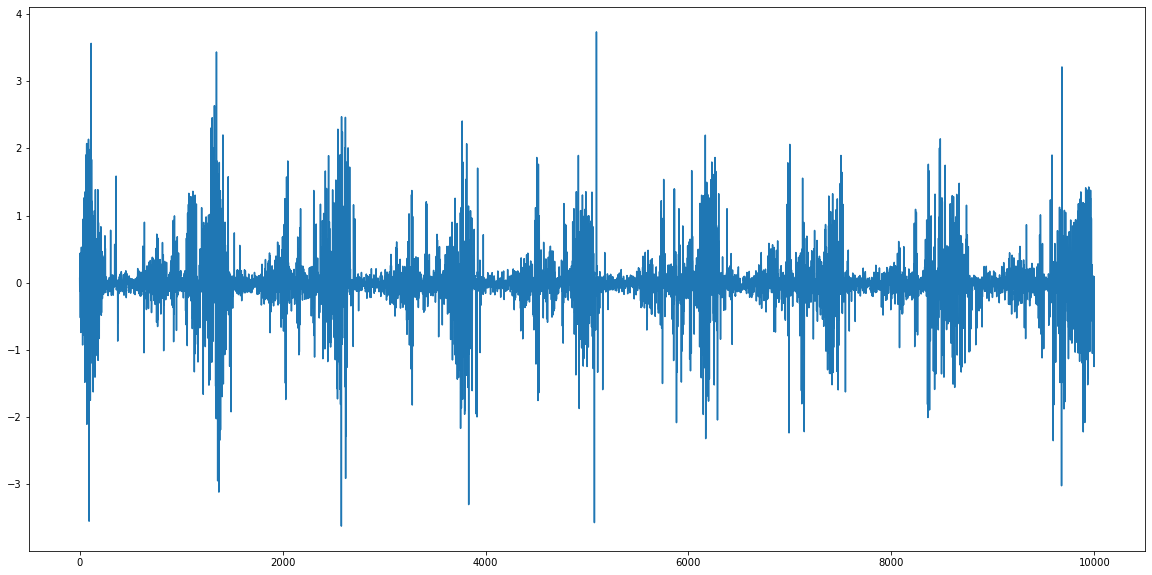

In [88]:
plt.plot(final['Data_y'][5][:10000])

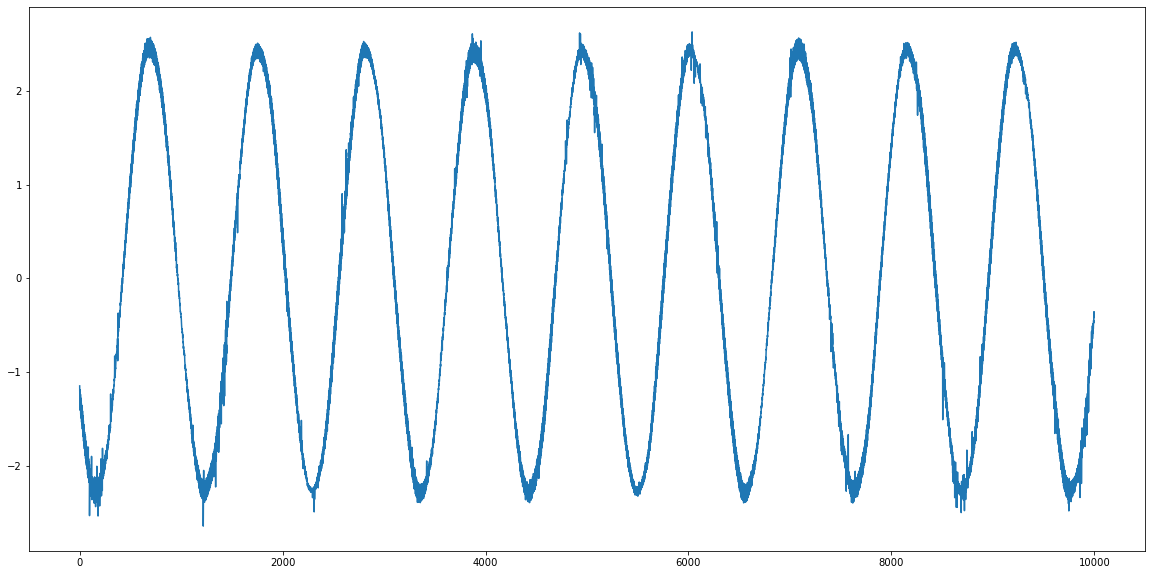

In [21]:
plt.plot(final['Data_y'][4][0:10000])

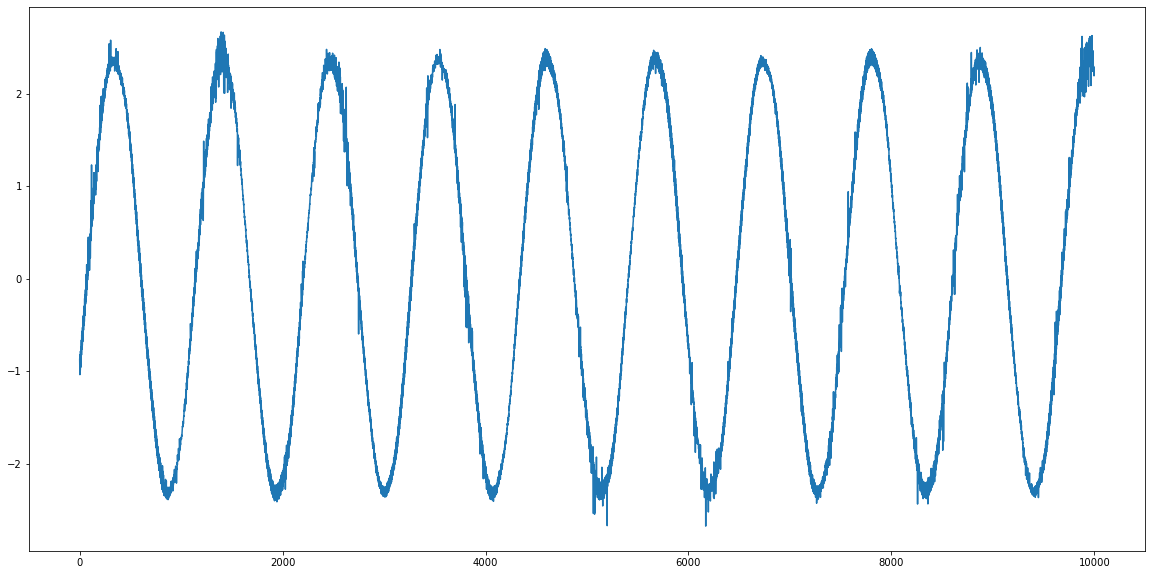

In [20]:
plt.plot(final['Data_y'][3][0:10000])

In [ ]:
len(final['Data_y'][0])

In [ ]:
cm_data_y['Min'].apply(lambda x: x.flatten()[0]).unique()

In [ ]:
len(pd.DataFrame(df['Y'][0].flatten())['Data'][5].flatten())

In [ ]:
pd.DataFrame(df['Description'][0].flatten())

In [ ]:
pd.DataFrame(pd.DataFrame(df['Description'][0].flatten())['Measurement'])['Measurement'][0].flatten()

#### Artificial Damage

In [48]:
data_dict = scipy.io.loadmat(r'/Users/arivarasuperumal/Desktop/condition_monitoring/iot-condition-monitoring/data/N09_M07_F10_KA01_1.mat')
data_array = data_dict['N09_M07_F10_KA01_1']

In [49]:
df_artificial = pd.DataFrame(data_array.flatten())

In [50]:
df_artificial

,Info,X,Y,Description
0,"[[[[[2]], [[1]], [[31]]]]]","[[[[], [[4]], [[-1.25323521e-04 1.24895795e-0...","[[[['force'], [[4]], [[1036.51572195 1031.6329...","[[[[[(array(['admin'], dtype='<U5'), array(['1..."


In [51]:
pd.DataFrame(df_artificial['X'][0].flatten())

,Name,Type,Data,Unit,Raster
0,[],[[4]],"[[-0.00012532352074403653, 0.00012489579541726...",[],[Mech_4kHz]
1,[],[[4]],"[[0.0, 1.5398111763772517e-05, 3.1223948854316...",[],[HostService]
2,[],[[4]],"[[-0.002812721748849098, 0.9971868505258241, 1...",[],[Temp_1Hz]


In [57]:
len(pd.DataFrame(df_artificial['X'][0].flatten())['Data'][2].flatten())

5

In [53]:
pd.DataFrame(df_artificial['Y'][0].flatten())

,Name,Type,Data,Unit,Raster,Device,XIndex,DownSampling,Description,DisplayIdentifier,Path,Flags,Min,Max,MinWeak,MaxWeak
0,[force],[[4]],"[[1036.5157219469415, 1031.6329094501684, 1028...",[],[Mech_4kHz],[Platform],[[1]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
1,[phase_current_1],[[4]],"[[2.4238229354098992, 2.4004043563238127, 2.42...",[],[HostService],[Platform],[[2]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
2,[phase_current_2],[[4]],"[[-1.3982269277868982, -1.3548336783038566, -1...",[],[HostService],[Platform],[[2]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
3,[speed],[[4]],"[[899.956245792045, 899.9562749276922, 899.956...",[],[Mech_4kHz],[Platform],[[1]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
4,[temp_2_bearing_module],[[4]],"[[46.47216793803817, 46.31958004751401, 46.115...",[],[Temp_1Hz],[Platform],[[3]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
5,[torque],[[4]],"[[1.2332749994178167, 1.2182687262629481, 1.20...",[],[Mech_4kHz],[Platform],[[1]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
6,[vibration_1],[[4]],"[[-0.0183105468628992, -0.13427734366126082, -...",[],[HostService],[Platform],[[2]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]


In [65]:
len(pd.DataFrame(df_artificial['Y'][0].flatten())['Data'][0].flatten())

16001

In [66]:
cm_data_x = pd.DataFrame(df_artificial['X'][0].flatten())

cm_data_x['Raster'] = cm_data_x['Raster'].apply(lambda x: x.flatten()[0])
cm_data_x['Type'] = cm_data_x['Type'].apply(lambda x: x.flatten()[0])
cm_data_x['Data'] = cm_data_x['Data'].apply(lambda x: x.flatten())

In [67]:
cm_data_y = pd.DataFrame(df_artificial['Y'][0].flatten())

cm_data_y['Name'] = cm_data_y['Name'].apply(lambda x: x.flatten()[0])
cm_data_y['Type'] = cm_data_y['Type'].apply(lambda x: x.flatten()[0])
cm_data_y['Data'] = cm_data_y['Data'].apply(lambda x: x.flatten())
cm_data_y['Unit'] = cm_data_y['Unit'].apply(lambda x: x.flatten())
cm_data_y['Raster'] = cm_data_y['Raster'].apply(lambda x: x.flatten()[0])
cm_data_y['Device'] = cm_data_y['Device'].apply(lambda x: x.flatten()[0])
cm_data_y['XIndex'] = cm_data_y['XIndex'].apply(lambda x: x.flatten()[0])
cm_data_y['DownSampling'] = cm_data_y['DownSampling'].apply(lambda x: x.flatten()[0])

In [68]:
final = cm_data_x[['Raster','Data','Type']].merge(cm_data_y[['Name','Type','Data','Raster','Device','XIndex','DownSampling']], on = 'Raster', how = 'left')

In [71]:
final

,Raster,Data_x,Type_x,Name,Type_y,Data_y,Device,XIndex,DownSampling
0,Mech_4kHz,"[-0.00012532352074403653, 0.000124895795417265...",4,force,4,"[1036.5157219469415, 1031.6329094501684, 1028....",Platform,1,1
1,Mech_4kHz,"[-0.00012532352074403653, 0.000124895795417265...",4,speed,4,"[899.956245792045, 899.9562749276922, 899.9563...",Platform,1,1
2,Mech_4kHz,"[-0.00012532352074403653, 0.000124895795417265...",4,torque,4,"[1.2332749994178167, 1.2182687262629481, 1.203...",Platform,1,1
3,HostService,"[0.0, 1.5398111763772517e-05, 3.12239488543166...",4,phase_current_1,4,"[2.4238229354098992, 2.4004043563238127, 2.427...",Platform,2,1
4,HostService,"[0.0, 1.5398111763772517e-05, 3.12239488543166...",4,phase_current_2,4,"[-1.3982269277868982, -1.3548336783038566, -1....",Platform,2,1
5,HostService,"[0.0, 1.5398111763772517e-05, 3.12239488543166...",4,vibration_1,4,"[-0.0183105468628992, -0.13427734366126082, -0...",Platform,2,1
6,Temp_1Hz,"[-0.002812721748849098, 0.9971868505258241, 1....",4,temp_2_bearing_module,4,"[46.47216793803817, 46.31958004751401, 46.1151...",Platform,3,1


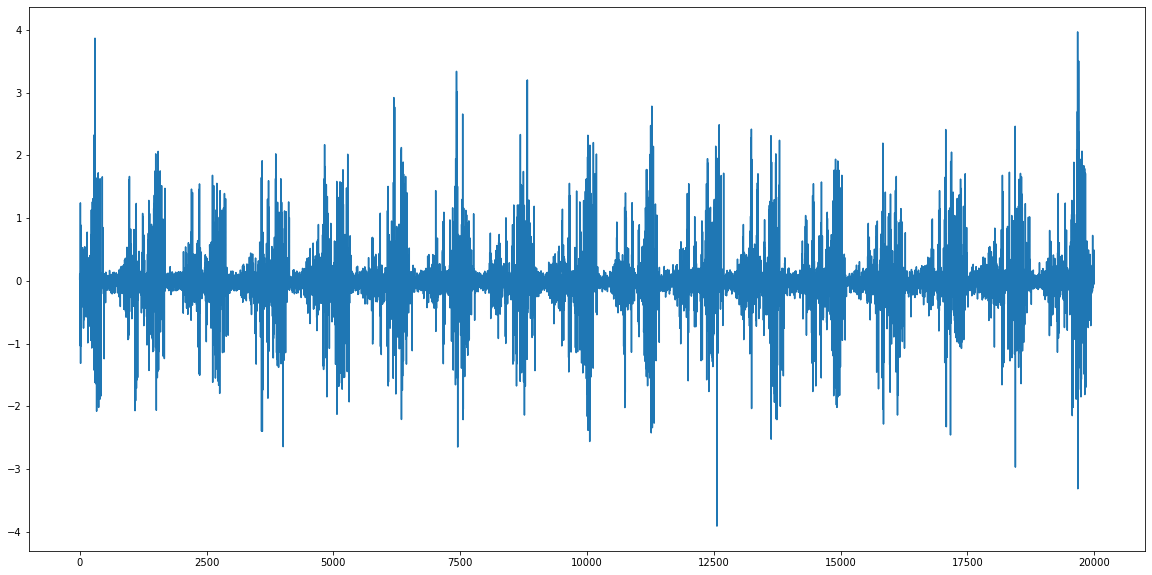

In [90]:
plt.plot(final['Data_y'][5][40000:60000])

#### Real Damage

In [58]:
data_dict = scipy.io.loadmat(r'/Users/arivarasuperumal/Desktop/condition_monitoring/iot-condition-monitoring/data/N09_M07_F10_KA04_1.mat')
data_array = data_dict['N09_M07_F10_KA04_1']

In [59]:
df_real = pd.DataFrame(data_array.flatten())

In [60]:
pd.DataFrame(df_real['X'][0].flatten())

,Name,Type,Data,Unit,Raster
0,[],[[4]],"[[-0.00010949815200482146, 0.00014029450725617...",[],[Mech_4kHz]
1,[],[[4]],"[[0.0, 1.5398177625677856e-05, 3.1224082407624...",[],[HostService]
2,[],[[4]],"[[-0.0028905801220647756, 0.997108992150779, 1...",[],[Temp_1Hz]


In [64]:
len(pd.DataFrame(df_artificial['X'][0].flatten())['Data'][2].flatten())

5

In [61]:
pd.DataFrame(df_real['Y'][0].flatten())

,Name,Type,Data,Unit,Raster,Device,XIndex,DownSampling,Description,DisplayIdentifier,Path,Flags,Min,Max,MinWeak,MaxWeak
0,[force],[[4]],"[[1162.5533195198977, 1163.4688468630427, 1161...",[],[Mech_4kHz],[Platform],[[1]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
1,[phase_current_1],[[4]],"[[-1.98851287710383, -2.024329527470785, -2.05...",[],[HostService],[Platform],[[2]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
2,[phase_current_2],[[4]],"[[0.18252716052390544, 0.07576599116086641, 0....",[],[HostService],[Platform],[[2]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
3,[speed],[[4]],"[[899.8326440096719, 899.8324440867648, 899.83...",[],[Mech_4kHz],[Platform],[[1]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
4,[temp_2_bearing_module],[[4]],"[[54.815673791899236, 54.82788082314117, 54.76...",[],[Temp_1Hz],[Platform],[[3]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
5,[torque],[[4]],"[[1.164409675545016, 1.1594017067629967, 1.136...",[],[Mech_4kHz],[Platform],[[1]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]
6,[vibration_1],[[4]],"[[0.1800537108185088, 0.0885009765040128, -0.0...",[],[HostService],[Platform],[[2]],[[1]],[],[],[Model Root/Einggangssignal],[[2]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]],[[-1.7976931348623157e+308]],[[1.7976931348623157e+308]]


In [91]:
cm_data_x = pd.DataFrame(df_real['X'][0].flatten())

cm_data_x['Raster'] = cm_data_x['Raster'].apply(lambda x: x.flatten()[0])
cm_data_x['Type'] = cm_data_x['Type'].apply(lambda x: x.flatten()[0])
cm_data_x['Data'] = cm_data_x['Data'].apply(lambda x: x.flatten())

In [92]:
cm_data_y = pd.DataFrame(df_real['Y'][0].flatten())

cm_data_y['Name'] = cm_data_y['Name'].apply(lambda x: x.flatten()[0])
cm_data_y['Type'] = cm_data_y['Type'].apply(lambda x: x.flatten()[0])
cm_data_y['Data'] = cm_data_y['Data'].apply(lambda x: x.flatten())
cm_data_y['Unit'] = cm_data_y['Unit'].apply(lambda x: x.flatten())
cm_data_y['Raster'] = cm_data_y['Raster'].apply(lambda x: x.flatten()[0])
cm_data_y['Device'] = cm_data_y['Device'].apply(lambda x: x.flatten()[0])
cm_data_y['XIndex'] = cm_data_y['XIndex'].apply(lambda x: x.flatten()[0])
cm_data_y['DownSampling'] = cm_data_y['DownSampling'].apply(lambda x: x.flatten()[0])

In [98]:
final = cm_data_x[['Raster','Data','Type']].merge(cm_data_y[['Name','Type','Data','Raster','Device',
                                                             'XIndex','DownSampling']], 
                                                  on = 'Raster', how = 'left')
final

,Raster,Data_x,Type_x,Name,Type_y,Data_y,Device,XIndex,DownSampling
0,Mech_4kHz,"[-0.00010949815200482146, 0.000140294507256177...",4,force,4,"[1162.5533195198977, 1163.4688468630427, 1161....",Platform,1,1
1,Mech_4kHz,"[-0.00010949815200482146, 0.000140294507256177...",4,speed,4,"[899.8326440096719, 899.8324440867648, 899.832...",Platform,1,1
2,Mech_4kHz,"[-0.00010949815200482146, 0.000140294507256177...",4,torque,4,"[1.164409675545016, 1.1594017067629967, 1.1360...",Platform,1,1
3,HostService,"[0.0, 1.5398177625677856e-05, 3.12240824076248...",4,phase_current_1,4,"[-1.98851287710383, -2.024329527470785, -2.057...",Platform,2,1
4,HostService,"[0.0, 1.5398177625677856e-05, 3.12240824076248...",4,phase_current_2,4,"[0.18252716052390544, 0.07576599116086641, 0.0...",Platform,2,1
5,HostService,"[0.0, 1.5398177625677856e-05, 3.12240824076248...",4,vibration_1,4,"[0.1800537108185088, 0.0885009765040128, -0.05...",Platform,2,1
6,Temp_1Hz,"[-0.0028905801220647756, 0.997108992150779, 1....",4,temp_2_bearing_module,4,"[54.815673791899236, 54.82788082314117, 54.766...",Platform,3,1


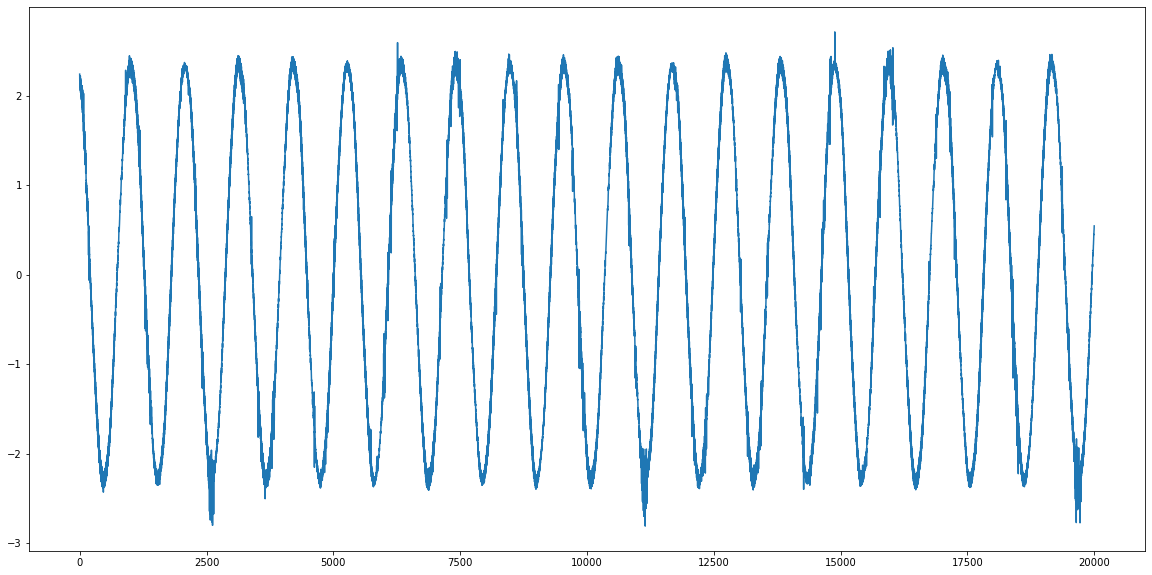

In [95]:
plt.plot(final['Data_y'][3][40000:60000])

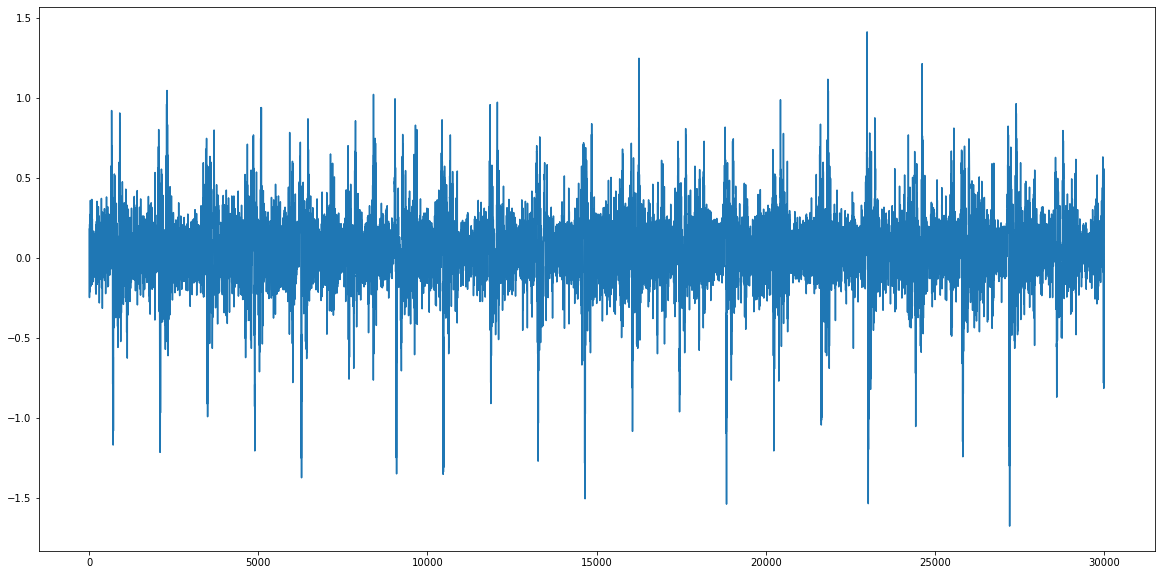

In [97]:
plt.plot(final['Data_y'][5][:30000])